In [173]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t  # probabilidad de mutación
generaciones = 50 # número de generaciones
target = 0         # objetivo de minimización 
etapas = 20        # número de etapas

In [175]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [176]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[0 0 0 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 1 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [1 1 1 ... 0 1 0]
 [0 0 1 ... 1 1 1]]


In [177]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [178]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [179]:
def funcion(x):
    return np.sum(x**2)

In [180]:
def eva_funcion(ind, a, b, m, decimales):
    x = deco_ind(ind, a, b, m, decimales)
    return funcion(x)

In [181]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1]
Fenotipo: [-7.692 -2.632]
Evaluación f(x): 66.094288

Individuo 2:
Genotipo: [1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1]
Fenotipo: [4.026 2.669]
Evaluación f(x): 23.332237

Individuo 3:
Genotipo: [0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0]
Fenotipo: [-0.329  4.916]
Evaluación f(x): 24.275297000000002

Individuo 4:
Genotipo: [0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1]
Fenotipo: [-6.044  5.157]
Evaluación f(x): 63.124584999999996

Individuo 5:
Genotipo: [1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0]
Fenotipo: [ 1.476 -0.877]
Evaluación f(x): 2.947705

Individuo 6:
Genotipo: [1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0]
Fenotipo: [0.087 7.084]
Evaluación f(x): 50.19062499999999

Individuo 7:
Genotipo: [1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1]
Fenotipo: [2.983 6.886]
Evaluación f(x): 56.315285

Individ

In [182]:
def ruleta(pob, m, a, b, decimales, epsilon):
    aptitudes = []
    for ind in pob:
        f_val = eva_funcion(ind, m, a, b, decimales)
        aptitud = 1/(f_val + epsilon)  # función de evaluación de aptitud
        aptitudes.append(aptitud)
    aptitudes = np.array(aptitudes)
    
    total_aptitud = np.sum(aptitudes) # suma acumulada de aptitudes
    probas = aptitudes / total_aptitud
    
    
    acc_n = np.cumsum(probas) # acumulado de las sumas
    
    
    t = np.random.rand() # número aleatorio
    ind_seleccionado = np.where(acc_n >= t)[0][0]
    return pob[ind_seleccionado], ind_seleccionado

In [183]:
selecto, index = ruleta(pob, m, a, b, decimales, epsilon)
deco_selecto = deco_ind(selecto, m, a, b, decimales)
print("\nIndividuo seleccionado por la ruleta (índice {}):".format(index))
print("Genotipo:", selecto)
print("Fenotipo (x1, x2):", deco_selecto)
print("Evaluación f(x):", eva_funcion(selecto, m, a, b, decimales))




Individuo seleccionado por la ruleta (índice 17):
Genotipo: [0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1]
Fenotipo (x1, x2): [-2.395  1.244]
Evaluación f(x): 7.283561


In [184]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [185]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [186]:
def main():
    new_pob = []
    
    
    while len(new_pob) < pob_size:
            padre1, _ = ruleta(pob, m, a, b, decimales, epsilon)
            padre2, _ = ruleta(pob, m, a, b, decimales, epsilon)

            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)

            new_pob.append(hijo1)
            if len(new_pob) < pob_size:
                new_pob.append(hijo2)
    
    new_pob = np.array(new_pob)
    print("Nueva población tras cruza y mutación:")
    print(new_pob)

if __name__ == "__main__":
    main()

Nueva población tras cruza y mutación:
[[1 0 0 ... 0 0 0]
 [1 1 1 ... 0 1 1]
 [0 1 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 0]
 [1 1 0 ... 1 1 1]]



=== Etapa 1 ===
Generación 1 - Mejor: 3.526 | Promedio: 62.852
Generación 2 - Mejor: 3.526 | Promedio: 62.852
Generación 3 - Mejor: 3.526 | Promedio: 62.852
Generación 4 - Mejor: 3.526 | Promedio: 62.852
Generación 5 - Mejor: 3.526 | Promedio: 62.852
Generación 6 - Mejor: 3.526 | Promedio: 62.852
Generación 7 - Mejor: 3.526 | Promedio: 62.852
Generación 8 - Mejor: 3.526 | Promedio: 62.852
Generación 9 - Mejor: 3.526 | Promedio: 62.852
Generación 10 - Mejor: 3.526 | Promedio: 62.852
Generación 11 - Mejor: 3.526 | Promedio: 62.852
Generación 12 - Mejor: 3.526 | Promedio: 62.852
Generación 13 - Mejor: 3.526 | Promedio: 62.852
Generación 14 - Mejor: 3.526 | Promedio: 62.852
Generación 15 - Mejor: 3.526 | Promedio: 62.852
Generación 16 - Mejor: 3.526 | Promedio: 62.852
Generación 17 - Mejor: 3.526 | Promedio: 62.852
Generación 18 - Mejor: 3.526 | Promedio: 62.852
Generación 19 - Mejor: 3.526 | Promedio: 62.852
Generación 20 - Mejor: 3.526 | Promedio: 62.852
Generación 21 - Mejor: 3.526 | P

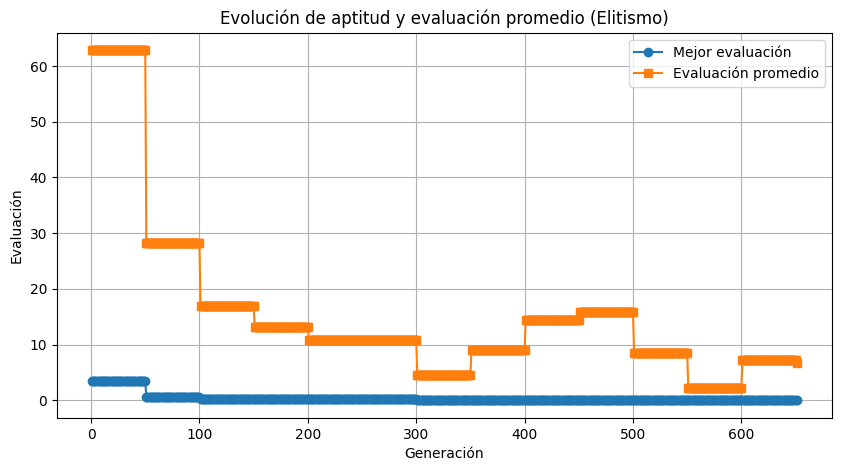

In [187]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, etapas, generaciones, target=0):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    generacion = 0
    h = [] # diccionario con el historial de aptitudes
    h_pp = [] # aptitudes promedio

    elite = int(np.ceil(0.1 * pob_size)) # se considera al 10% de la población como elite
     
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[evaluar.index(mejor_ahora)]
            
            print(f"Generación {generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")

            if round(mejor_ahora, decimales) <= target:
                print("Se ha alcanzado el objetivo")
                return mejor_hijo, mejor_ahora, generacion, h, h_pp 
    
            #elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]

        
        # nueva población
        new_pob_elite = []
        while len(new_pob_elite) < (pob_size - elite):
            
            padre1, _ = ruleta(pob, m, a, b, decimales, epsilon)
            padre2, _ = ruleta(pob, m, a, b, decimales, epsilon)
            
            
            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)
            
            new_pob_elite.append(hijo1)
            if len(new_pob_elite) < (pob_size - elite):
                new_pob_elite.append(hijo2)
        new_pob = np.array(new_pob_elite + elite_idx)
        pob = np.array(new_pob)
    
    
    return mejor_hijo, mejor_aptitud, generacion, h, h_pp

def main():
    
    mejor_ind, mejor_api, generacion, h, h_pp= AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, etapas, generaciones, target)
    
    print("\nResultado final:")
    print("Generaciones:", generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_api, decimales))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(h) + 1), h, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(range(1, len(h_pp) + 1), h_pp, marker='s', linestyle='-', label="Evaluación promedio")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("Evolución de aptitud y evaluación promedio (Elitismo)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()



=== Etapa 1 ===
Generación 1 - Mejor: 3.6 | Promedio: 69.08
Generación 2 - Mejor: 3.6 | Promedio: 81.09
Generación 3 - Mejor: 3.6 | Promedio: 80.74
Generación 4 - Mejor: 2.75 | Promedio: 81.04
Generación 5 - Mejor: 2.75 | Promedio: 102.18
Generación 6 - Mejor: 2.75 | Promedio: 105.83
Generación 7 - Mejor: 2.75 | Promedio: 112.43
Generación 8 - Mejor: 2.75 | Promedio: 115.46
Generación 9 - Mejor: 2.75 | Promedio: 113.99
Generación 10 - Mejor: 2.75 | Promedio: 120.04
Generación 11 - Mejor: 1.97 | Promedio: 124.09
Generación 12 - Mejor: 1.97 | Promedio: 115.6
Generación 13 - Mejor: 1.97 | Promedio: 115.41
Generación 14 - Mejor: 1.97 | Promedio: 131.54
Generación 15 - Mejor: 1.97 | Promedio: 114.04
Generación 16 - Mejor: 0.07 | Promedio: 111.85
Generación 17 - Mejor: 0.07 | Promedio: 118.02
Generación 18 - Mejor: 0.07 | Promedio: 124.33
Generación 19 - Mejor: 0.07 | Promedio: 142.34
Generación 20 - Mejor: 0.07 | Promedio: 150.17
Fin de la Etapa 1: Mejor en etapa: 0.07 | Promedio etapa: 11

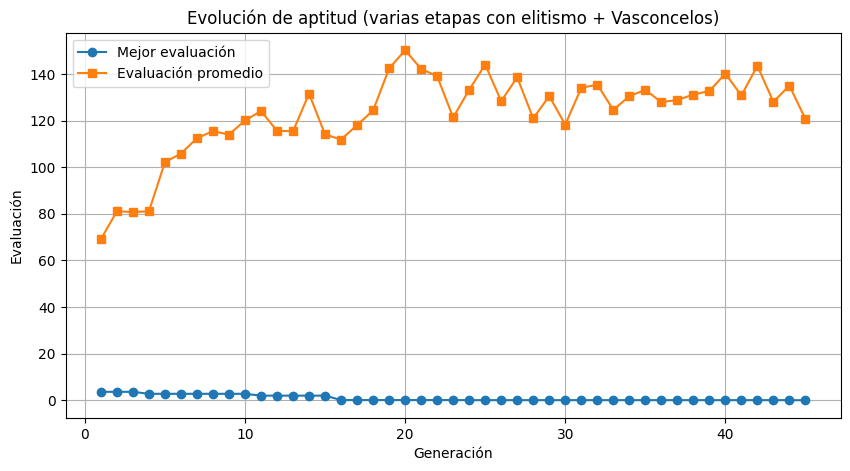

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar la población de individuos (cada uno es un vector binario)
def generate_population(pop_size, total_bits):
    return np.random.randint(0, 2, (pop_size, total_bits))

# Función para convertir un array binario a su valor decimal
def binary_to_decimal(binary_array):
    m = len(binary_array)
    powers = 2 ** np.arange(m - 1, -1, -1)
    return np.dot(binary_array, powers)

# Función para decodificar un individuo (genotipo) a un vector real (fenotipo)
def decode_individual(individual, m, a, b, decimales=2):
    # Para n = 2, cada individuo tiene 2*m bits
    n = len(individual) // m  
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = individual[start:end]
        dec_value = binary_to_decimal(gene)
        x = a + dec_value * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)

# Función esfera como función objetivo (f(x1,x2) = x1^2 + x2^2)
def sphere_function(x):
    return np.sum(x**2)

# Función de evaluación: decodifica el individuo y evalúa la función esfera
def eva_funcion(individual, m, a, b, decimales=2):
    x = decode_individual(individual, m, a, b, decimales)
    return sphere_function(x)

# Selección mediante el método Vasconcelos (basado en ranking)
def vasconcelos(pob, m, a, b, decimales, epsilon, s=1.5):
    """
    Selecciona un individuo de la población usando el método de Vasconcelos.
    
    Se evalúan todos los individuos (para minimización, menor es mejor), se ordenan y
    se asignan probabilidades según la fórmula:
    
      P(i) = (2-s)/N + [2*i*(s-1)]/(N*(N-1))
    
    donde i es el rango (0 para el mejor).
    """
    fitnesses = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
    N = len(pob)
    sorted_indices = np.argsort(fitnesses)
    
    probabilities = np.zeros(N)
    for rank, idx in enumerate(sorted_indices):
        if N > 1:
            probabilities[idx] = (2 - s) / N + (2 * rank * (s - 1)) / (N * (N - 1))
        else:
            probabilities[idx] = 1.0
    probabilities = probabilities / np.sum(probabilities)
    
    cumulative = np.cumsum(probabilities)
    r = np.random.rand()
    selected_index = np.where(cumulative >= r)[0][0]
    return pob[selected_index], selected_index

# Operador de cruza (crossover) de un solo punto
def cruzar(parent1, parent2, proba_cruza):
    if np.random.rand() < proba_cruza:
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1.copy(), parent2.copy()

# Operador de mutación: cambia cada bit con probabilidad proba_muta
def mutar(individual, proba_muta):
    mutated = individual.copy()
    for i in range(len(mutated)):
        if np.random.rand() < proba_muta:
            mutated[i] = 1 - mutated[i]
    return mutated

# Algoritmo Genético con elitismo y ejecución en varias etapas
def AG_etapas(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
              num_stages, gens_per_stage, target=0, s=1.5):
    total_bits = 2 * m  # Para n = 2
    pob = generate_population(pob_size, total_bits)
    
    best_hijo = None
    best_aptitud = np.inf
    total_generations = 0
    overall_history = []      # Historial del mejor fitness (por generación)
    overall_avg_history = []  # Historial del promedio de evaluaciones (por generación)
    
    elite_count = int(np.ceil(0.1 * pob_size))
    
    for stage in range(num_stages):
        print(f"\n=== Etapa {stage+1} ===")
        stage_history = []
        stage_avg = []
        for gen in range(gens_per_stage):
            total_generations += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            current_best = min(evaluar)
            current_avg = np.mean(evaluar)
            stage_history.append(current_best)
            stage_avg.append(current_avg)
            overall_history.append(current_best)
            overall_avg_history.append(current_avg)
            
            if current_best < best_aptitud:
                best_aptitud = current_best
                best_hijo = pob[evaluar.index(current_best)]
            
            print(f"Generación {total_generations} - Mejor: {round(current_best, decimales)} | Promedio: {round(current_avg, decimales)}")
            
            if round(current_best, decimales) <= target:
                print("Se ha alcanzado el objetivo.")
                return best_hijo, best_aptitud, total_generations, overall_history, overall_avg_history
            
            # Generar nueva población usando elitismo:
            sorted_indices = np.argsort(evaluar)
            elite_individuos = [pob[i] for i in sorted_indices[:elite_count]]
            
            offspring = []
            while len(offspring) < (pob_size - elite_count):
                padre1, _ = vasconcelos(pob, m, a, b, decimales, epsilon, s)
                padre2, _ = vasconcelos(pob, m, a, b, decimales, epsilon, s)
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                offspring.append(hijo1)
                if len(offspring) < (pob_size - elite_count):
                    offspring.append(hijo2)
            pob = np.array(elite_individuos + offspring)
        
        print(f"Fin de la Etapa {stage+1}: Mejor en etapa: {round(min(stage_history), decimales)} | Promedio etapa: {round(np.mean(stage_avg), decimales)}")
    
    return best_hijo, best_aptitud, total_generations, overall_history, overall_avg_history

def main():
    # Parámetros del algoritmo
    pob_size = 50              # Población de 50 individuos
    m = 14                     # Bits por variable (28 bits en total para n = 2)
    a = -10                    # Límite inferior
    b = 10                     # Límite superior
    decimales = 2
    epsilon = 1e-6
    proba_cruza = 0.7          # Probabilidad de cruza
    proba_muta = 0.01          # Probabilidad de mutación por bit
    num_stages = 3             # Número de etapas (fases)
    gens_per_stage = 20        # Generaciones por etapa
    target = 0                 # Objetivo (mínimo de la función esfera)
    s = 1.5                    # Parámetro de presión selectiva para Vasconcelos
    
    best_ind, best_eval, total_gens, best_history, avg_history = AG_etapas(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        num_stages, gens_per_stage, target, s)
    
    print("\nResultado final:")
    print("Total de generaciones:", total_gens)
    print("Mejor genotipo:", best_ind)
    print("Mejor fenotipo (x1, x2):", decode_individual(best_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,x2):", round(best_eval, decimales))
    
    # Graficar la evolución del mejor fitness y el promedio por generación
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(best_history) + 1), best_history, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(range(1, len(avg_history) + 1), avg_history, marker='s', linestyle='-', label="Evaluación promedio")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("Evolución de aptitud (varias etapas con elitismo + Vasconcelos)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
